In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0
import tensorflow as tf
tf.__version__

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling

'2.15.0'

Install Open Dataset to bring the dataset here

In [ ]:
from google.colab import drive
import shutil, csv

drive.mount('/content/drive')
shutil.copy('/content/drive/MyDrive/4 - Pipeline Evaluation Data/LT_Ankle.zip', 'LT_Ankle.zip')
shutil.copy("/content/drive/MyDrive/3 - JE-Net Data/Trained_JENet_Model_LT.keras", "Trained_JENet_Model_LT.keras")
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import zipfile

Ankle_image_zip_address = '/content/LT_Ankle.zip'
# Bones_image_zip_address = '/content/LT_Bones.zip'
Ankle_images_dir = '/content/LT_Ankle/'
# Bones_images_dir = '/content/LT_Bones/'

with zipfile.ZipFile(Ankle_image_zip_address, 'r') as zip_ref:
    zip_ref.extractall('/content')
"""shutil.move('LT', Ankle_images_dir)
with zipfile.ZipFile(Bones_image_zip_address, 'r') as zip_ref:
    zip_ref.extractall('/content')
shutil.move('LT', Bones_images_dir)"""

"shutil.move('LT', Ankle_images_dir)\nwith zipfile.ZipFile(Bones_image_zip_address, 'r') as zip_ref:\n    zip_ref.extractall('/content')\nshutil.move('LT', Bones_images_dir)"

Import required libraries

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image
from PIL import Image
import numpy as np
import os, random
import torch
from torchvision import transforms




from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

Split the data into train/test randomly and put them into sensor batch format to be used by Keras

In [ ]:
input_images_dir = Ankle_images_dir
Original_image_resolution = [400, 980]
image_resolutions = [240, 592] # This is set for the LT images. Very close to the size of original images, but we had to resize it so it can be used in the network

Eval_input_images = []

files = os.listdir(input_images_dir)
files.sort(key=lambda f: int(f.split('.')[0]))
print(files)
for idx, file in enumerate(files):
    my_image = tf.io.read_file(input_images_dir + file)
    tensor = tf.io.decode_image(my_image, channels=1, dtype=tf.dtypes.float32)
    tensor_image = tf.image.resize(tensor, [image_resolutions[0], image_resolutions[1]])
    Eval_input_images.append(tensor_image)

Eval_input_images = tf.stack(Eval_input_images)

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png', '101.pn

Randomly show a Training input and its desired output, and a Test input and its desired output. The images generated each time is choosed rendomly

(-0.5, 591.5, 239.5, -0.5)

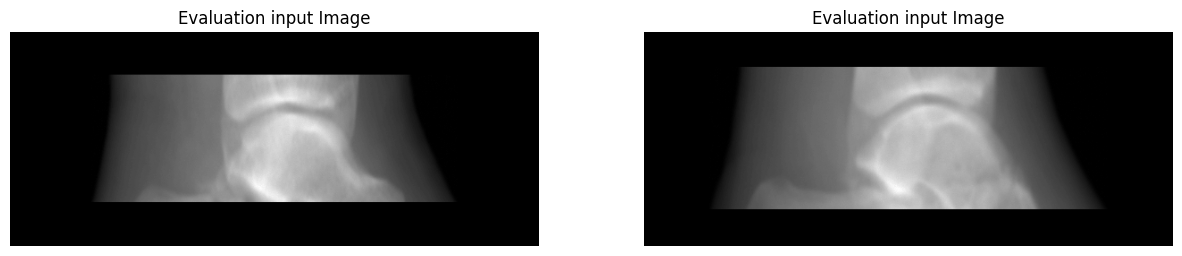

In [ ]:
%matplotlib inline
rand_idx = random.randint(0, len(Eval_input_images))
im1 = tf.squeeze(tf.slice(Eval_input_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])
rand_idx = random.randint(0, len(Eval_input_images))
im2 = tf.squeeze(tf.slice(Eval_input_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(1,2)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2 , cmap='gray')
ax[0].set_title('Evaluation input Image')
ax[1].set_title('Evaluation input Image')
ax[0].axis('off')
ax[1].axis('off')

Load the trained model

In [ ]:
len(Eval_input_images)

1000

In [ ]:
# Loss functions
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim_multiscale(y_true, y_pred, max_val=1.0, filter_size=7))

model = tf.keras.models.load_model('Trained_JENet_Model_LT.keras', custom_objects={ 'ssim_loss': ssim_loss })

In [ ]:
!python --version

Python 3.10.12


In [ ]:
predictions = model.predict(Eval_input_images)
test_prediction_images = tf.convert_to_tensor(predictions)

32/32 [==============================] - 7s 57ms/step


(-0.5, 591.5, 239.5, -0.5)

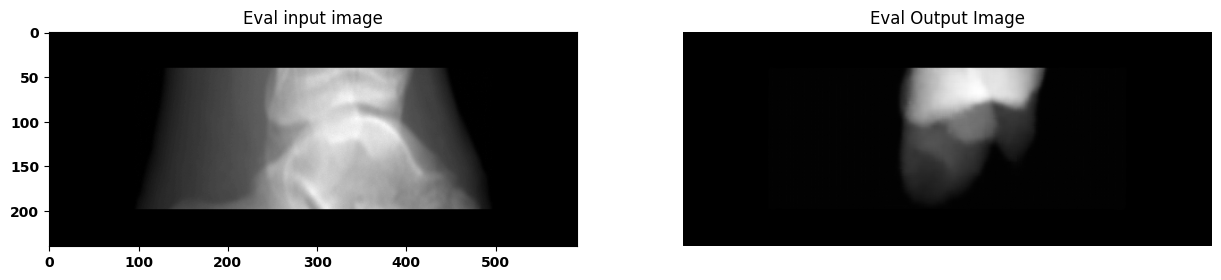

In [ ]:
%matplotlib inline
rand_idx = random.randint(0, len(Eval_input_images))
im1 = tf.squeeze(tf.slice(Eval_input_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])
im2 = tf.squeeze(tf.slice(test_prediction_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])

plt.rcParams['figure.figsize'] = [15, 15]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
fig, ax = plt.subplots(1,2)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2 , cmap='gray')
ax[0].set_title('Eval input image')
ax[1].set_title('Eval Output Image')
ax[1].axis('off')

In [ ]:
from torchvision.utils import save_image
from PIL import Image

os.mkdir('LT_Bones')
for i in range(len(predictions)):
    img = predictions[i]
    img = tf.image.resize(img, [Original_image_resolution[0], Original_image_resolution[1]])
    img = tf.squeeze(img)
    fp = str(i+1)
    fp = "/content/LT_Bones/" + fp + ".png"
    img = img.numpy()
    img2 = np.zeros([Original_image_resolution[0], Original_image_resolution[1], 3])
    img2[:,:,0] = img
    img2[:,:,1] = img
    img2[:,:,2] = img
    image = Image.fromarray((img2 * 255).astype(np.uint8))
    image = image.convert('RGB')
    image.save(fp, format='PNG')

In [ ]:
zip_name = 'LT_Bones'
directory_name = '/content/LT_Bones'

# Create 'path\to\zip_file.zip'
shutil.make_archive(zip_name, 'zip', directory_name)

drive.mount('/content/drive')
shutil.copy("LT_Bones.zip", "/content/drive/MyDrive/4 - Pipeline Evaluation Data/LT_Bones.zip")
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
#from google.colab import runtime
#runtime.unassign()